---
# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r'C:\Users\s\Desktop\해커톤/pets.xlsx')
df.fillna(0)

,접수일,공고시작일,공고종료일,품종_대분류_CODE(개/고양이/기타),품종_소분류_CODE,나이(출생년도),성별(M/F/Q),중성화여부(Y/N/U),체중(Kg),색상_CODE,상태_CODE,특징_CODE(있음/없음),관할기관_CODE
0,20200521,20200522,20200601,1,3,2018,2,2,5.3,22,1,1.0,1
1,20200520,20200520,20200601,1,3,2020,1,3,1.0,22,1,0.0,2
2,20200521,20200521,20200531,1,3,2017,2,2,20.0,22,3,1.0,3
3,20200521,20200522,20200601,1,3,2019,2,3,2.0,22,5,1.0,4
4,20200521,20200522,20200601,2,45,2020,1,2,0.2,9,6,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20200521,20200521,20200530,1,3,2020,1,2,2.0,1,6,1.0,173
996,20200521,20200521,20200530,1,3,2020,2,2,2.0,22,6,1.0,173
997,20200520,20200520,20200529,1,3,2020,1,2,2.0,22,6,1.0,173
998,20200521,20200521,20200530,1,10,2019,1,2,12.0,16,6,1.0,173


---
# 2. EDA & Feature Engineering

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df.describe()

,접수일,공고시작일,공고종료일,품종_대분류_CODE(개/고양이/기타),품종_소분류_CODE,나이(출생년도),성별(M/F/Q),중성화여부(Y/N/U),체중(Kg),색상_CODE,상태_CODE,특징_CODE(있음/없음),관할기관_CODE
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,903.0,1000.00000
mean,2.020052e+07,2.020052e+07,2.020060e+07,1.404000,22.187000,2018.630000,1.629000,2.231000,4.533100,11.334000,5.046000,1.0,85.55100
std,5.907859e-01,1.539859e+01,2.038601e+01,0.524461,19.599086,2.329061,0.636997,0.497882,5.603864,7.898914,1.964623,0.0,50.88226
min,2.020052e+07,2.020052e+07,2.020053e+07,1.000000,1.000000,2001.000000,1.000000,1.000000,0.030000,1.000000,1.000000,1.0,1.00000
25%,2.020052e+07,2.020052e+07,2.020060e+07,1.000000,3.000000,2018.000000,1.000000,2.000000,0.580000,5.000000,3.000000,1.0,39.00000
50%,2.020052e+07,2.020052e+07,2.020060e+07,1.000000,12.500000,2020.000000,2.000000,2.000000,3.000000,10.000000,6.000000,1.0,78.00000
75%,2.020052e+07,2.020052e+07,2.020060e+07,2.000000,45.000000,2020.000000,2.000000,3.000000,6.000000,18.000000,6.000000,1.0,133.00000
max,2.020052e+07,2.020071e+07,2.020072e+07,3.000000,54.000000,2020.000000,3.000000,3.000000,40.000000,22.000000,7.000000,1.0,173.00000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44060 missing from current fon

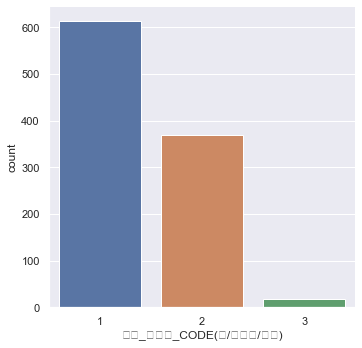

In [5]:
sns.catplot(data = df, x = '품종_대분류_CODE(개/고양이/기타)', kind = 'count')

---
# 3. Dataset 구성하기

In [6]:
print(df.shape)

(1000, 13)


In [7]:
df.fillna(0)

,접수일,공고시작일,공고종료일,품종_대분류_CODE(개/고양이/기타),품종_소분류_CODE,나이(출생년도),성별(M/F/Q),중성화여부(Y/N/U),체중(Kg),색상_CODE,상태_CODE,특징_CODE(있음/없음),관할기관_CODE
0,20200521,20200522,20200601,1,3,2018,2,2,5.3,22,1,1.0,1
1,20200520,20200520,20200601,1,3,2020,1,3,1.0,22,1,0.0,2
2,20200521,20200521,20200531,1,3,2017,2,2,20.0,22,3,1.0,3
3,20200521,20200522,20200601,1,3,2019,2,3,2.0,22,5,1.0,4
4,20200521,20200522,20200601,2,45,2020,1,2,0.2,9,6,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20200521,20200521,20200530,1,3,2020,1,2,2.0,1,6,1.0,173
996,20200521,20200521,20200530,1,3,2020,2,2,2.0,22,6,1.0,173
997,20200520,20200520,20200529,1,3,2020,1,2,2.0,22,6,1.0,173
998,20200521,20200521,20200530,1,10,2019,1,2,12.0,16,6,1.0,173


In [8]:
df.drop('공고시작일', axis = 1, inplace = True)
df.fillna(0)

,접수일,공고종료일,품종_대분류_CODE(개/고양이/기타),품종_소분류_CODE,나이(출생년도),성별(M/F/Q),중성화여부(Y/N/U),체중(Kg),색상_CODE,상태_CODE,특징_CODE(있음/없음),관할기관_CODE
0,20200521,20200601,1,3,2018,2,2,5.3,22,1,1.0,1
1,20200520,20200601,1,3,2020,1,3,1.0,22,1,0.0,2
2,20200521,20200531,1,3,2017,2,2,20.0,22,3,1.0,3
3,20200521,20200601,1,3,2019,2,3,2.0,22,5,1.0,4
4,20200521,20200601,2,45,2020,1,2,0.2,9,6,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,20200521,20200530,1,3,2020,1,2,2.0,1,6,1.0,173
996,20200521,20200530,1,3,2020,2,2,2.0,22,6,1.0,173
997,20200520,20200529,1,3,2020,1,2,2.0,22,6,1.0,173
998,20200521,20200530,1,10,2019,1,2,12.0,16,6,1.0,173


In [9]:
df.drop('공고종료일', axis = 1, inplace = True)
df.fillna(0)

,접수일,품종_대분류_CODE(개/고양이/기타),품종_소분류_CODE,나이(출생년도),성별(M/F/Q),중성화여부(Y/N/U),체중(Kg),색상_CODE,상태_CODE,특징_CODE(있음/없음),관할기관_CODE
0,20200521,1,3,2018,2,2,5.3,22,1,1.0,1
1,20200520,1,3,2020,1,3,1.0,22,1,0.0,2
2,20200521,1,3,2017,2,2,20.0,22,3,1.0,3
3,20200521,1,3,2019,2,3,2.0,22,5,1.0,4
4,20200521,2,45,2020,1,2,0.2,9,6,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...
995,20200521,1,3,2020,1,2,2.0,1,6,1.0,173
996,20200521,1,3,2020,2,2,2.0,22,6,1.0,173
997,20200520,1,3,2020,1,2,2.0,22,6,1.0,173
998,20200521,1,10,2019,1,2,12.0,16,6,1.0,173


In [10]:
input_data = df.drop(['품종_대분류_CODE(개/고양이/기타)'], axis = 1)
target_data = df['품종_대분류_CODE(개/고양이/기타)']

print(input_data.shape, target_data.shape)

(1000, 10) (1000,)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 10) (200, 10) (800,) (200,)


---
# 4. 모델링 & 학습

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100)

forest.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').